In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier,Pool, cv

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline

import copy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import tensorflow as tf

import math

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


In [5]:
test.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,mckbezdplrukagl,2016-10-06,01:05:38 AM,station$143,station$142,SZAYASZ,whber,4.243393,50.866728,39.121387,whber,4.273543,50.868337,39.121387,2016,40,Thursday,False
1,agxwrnbmzbyxsjg,2016-10-06,01:05:56 AM,station$133,station$147,ICXYXY,whber,4.326220,50.880833,95.676301,whber,4.356801,50.845658,634.164740,2016,40,Thursday,False
2,iqjojyewdyfshtj,2016-10-06,06:11:54 AM,station$632,station$544,ICWAT,whber,3.264549,50.824506,153.115607,whber,3.710675,51.035896,309.014451,2016,40,Thursday,False
3,hssqexnzirioaag,2016-10-06,07:00:00 AM,station$296,station$281,ICWYR,whber,5.599695,50.613152,87.130058,whber,5.566695,50.624550,269.124277,2016,40,Thursday,False
4,lublknpfraiznhr,2016-10-06,07:00:09 AM,station$281,station$266,ICWYR,whber,5.566695,50.624550,269.124277,whber,4.715866,50.882280,351.916185,2016,40,Thursday,False


In [6]:
train.isnull().sum()

id_code                         0
current_date                    0
current_time                    0
source_name                     0
destination_name                0
train_name                      0
target                          0
country_code_source             1
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
country_code_destination       33
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
dtype: int64

In [7]:
train.shape, test.shape

((1284, 19), (964, 18))

In [8]:
train.dropna(inplace=True)

In [9]:
train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
31,mgtoldpcbopaoba,2016-07-27,11:41:46 PM,station$130,station$214,ICWVYA,high,whber,4.360846,50.859663,640.265896,whber,4.482785,51.017648,306.523121,2016,30,Wednesday,False
32,hbvekntxnxearzq,2016-07-28,12:04:25 AM,station$248,station$248,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,5.497685,50.967057,39.476879,2016,30,Thursday,False
34,rfwvjolvzoekxsq,2016-07-28,12:18:09 AM,station$248,station$147,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False
35,jcbfhwsqzpcifpe,2016-07-28,12:38:28 AM,station$177,station$130,ICXUYS,high,whber,4.482076,50.896456,171.020231,whber,4.360846,50.859663,640.265896,2016,30,Thursday,False
36,qfnccvisvjzlkxg,2016-07-28,08:50:27 AM,station$544,station$147,ICZVAT,medium,whber,3.710675,51.035896,309.014451,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False


In [10]:
train.dtypes

id_code                         object
current_date                    object
current_time                    object
source_name                     object
destination_name                object
train_name                      object
target                          object
country_code_source             object
longitude_source               float64
latitude_source                float64
mean_halt_times_source         float64
country_code_destination        object
longitude_destination          float64
latitude_destination           float64
mean_halt_times_destination    float64
current_year                     int64
current_week                     int64
current_day                     object
is_weekend                        bool
dtype: object

In [11]:
train['current_datetime'] = train['current_date'] + ' ' + train['current_time']
train = train.drop(['current_date','current_time'], axis=1)

test['current_datetime'] = test['current_date'] + ' ' + test['current_time']
test = test.drop(['current_date','current_time'], axis=1)

In [12]:
train.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,current_datetime
31,mgtoldpcbopaoba,station$130,station$214,ICWVYA,high,whber,4.360846,50.859663,640.265896,whber,4.482785,51.017648,306.523121,2016,30,Wednesday,False,2016-07-27 11:41:46 PM
32,hbvekntxnxearzq,station$248,station$248,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,5.497685,50.967057,39.476879,2016,30,Thursday,False,2016-07-28 12:04:25 AM
34,rfwvjolvzoekxsq,station$248,station$147,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False,2016-07-28 12:18:09 AM
35,jcbfhwsqzpcifpe,station$177,station$130,ICXUYS,high,whber,4.482076,50.896456,171.020231,whber,4.360846,50.859663,640.265896,2016,30,Thursday,False,2016-07-28 12:38:28 AM
36,qfnccvisvjzlkxg,station$544,station$147,ICZVAT,medium,whber,3.710675,51.035896,309.014451,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False,2016-07-28 08:50:27 AM


In [13]:
train['current_datetime'] = pd.to_datetime(train.current_datetime,format='%Y-%m-%d %I:%M:%S %p') 
test['current_datetime'] = pd.to_datetime(test.current_datetime,format='%Y-%m-%d %I:%M:%S %p')

In [14]:
for i in (train, test):
    i['current_month'] = i.current_datetime.dt.month
    i['current_dayn'] = i.current_datetime.dt.day
    i['hour'] = i.current_datetime.dt.hour
    i['minute'] = i.current_datetime.dt.minute
    i['second'] = i.current_datetime.dt.second

In [15]:
train.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,...,current_year,current_week,current_day,is_weekend,current_datetime,current_month,current_dayn,hour,minute,second
31,mgtoldpcbopaoba,station$130,station$214,ICWVYA,high,whber,4.360846,50.859663,640.265896,whber,...,2016,30,Wednesday,False,2016-07-27 23:41:46,7,27,23,41,46
32,hbvekntxnxearzq,station$248,station$248,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,...,2016,30,Thursday,False,2016-07-28 00:04:25,7,28,0,4,25
34,rfwvjolvzoekxsq,station$248,station$147,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,...,2016,30,Thursday,False,2016-07-28 00:18:09,7,28,0,18,9
35,jcbfhwsqzpcifpe,station$177,station$130,ICXUYS,high,whber,4.482076,50.896456,171.020231,whber,...,2016,30,Thursday,False,2016-07-28 00:38:28,7,28,0,38,28
36,qfnccvisvjzlkxg,station$544,station$147,ICZVAT,medium,whber,3.710675,51.035896,309.014451,whber,...,2016,30,Thursday,False,2016-07-28 08:50:27,7,28,8,50,27


In [16]:
test.head()

,id_code,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,...,current_year,current_week,current_day,is_weekend,current_datetime,current_month,current_dayn,hour,minute,second
0,mckbezdplrukagl,station$143,station$142,SZAYASZ,whber,4.243393,50.866728,39.121387,whber,4.273543,...,2016,40,Thursday,False,2016-10-06 01:05:38,10,6,1,5,38
1,agxwrnbmzbyxsjg,station$133,station$147,ICXYXY,whber,4.326220,50.880833,95.676301,whber,4.356801,...,2016,40,Thursday,False,2016-10-06 01:05:56,10,6,1,5,56
2,iqjojyewdyfshtj,station$632,station$544,ICWAT,whber,3.264549,50.824506,153.115607,whber,3.710675,...,2016,40,Thursday,False,2016-10-06 06:11:54,10,6,6,11,54
3,hssqexnzirioaag,station$296,station$281,ICWYR,whber,5.599695,50.613152,87.130058,whber,5.566695,...,2016,40,Thursday,False,2016-10-06 07:00:00,10,6,7,0,0
4,lublknpfraiznhr,station$281,station$266,ICWYR,whber,5.566695,50.624550,269.124277,whber,4.715866,...,2016,40,Thursday,False,2016-10-06 07:00:09,10,6,7,0,9


In [17]:
combi = train.append(test)

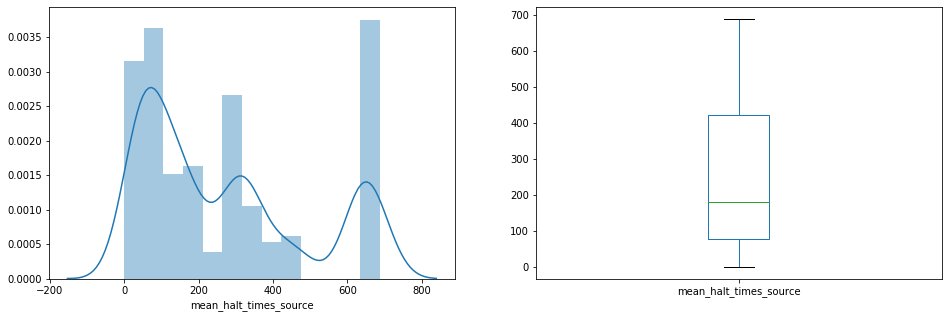

In [18]:
plt.subplot(121) 
sns.distplot(combi['mean_halt_times_source']); 
plt.subplot(122) 
combi['mean_halt_times_source'].plot.box(figsize=(16,5)) 
plt.show()

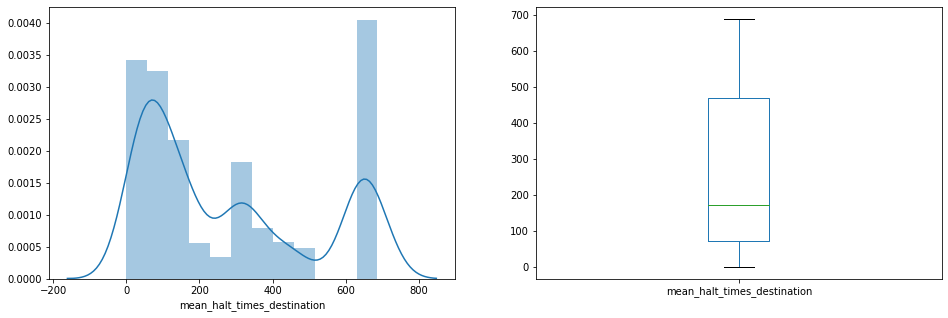

In [19]:
plt.subplot(121) 
sns.distplot(combi['mean_halt_times_destination']); 
plt.subplot(122) 
combi['mean_halt_times_destination'].plot.box(figsize=(16,5)) 
plt.show()

target               high  low  medium
country_code_source                   
logbp                   0    0       1
qwnll                   0    0       1
whber                 376  530     341
wsluu                   0    1       0


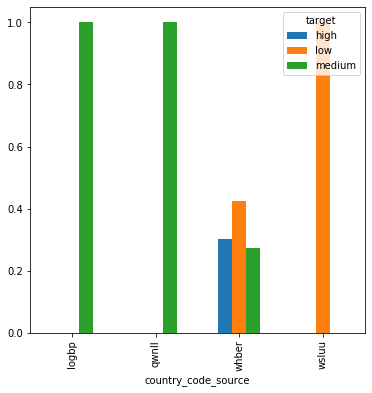

In [20]:
ccs = pd.crosstab(combi['country_code_source'],combi['target'])
print(ccs)
ccs.div(ccs.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,6))

target                    high  low  medium
country_code_destination                   
aqfre                        0    0       1
logbp                        0    0       1
qwnll                        0    0       1
whber                      376  530     340
zxdec                        0    1       0


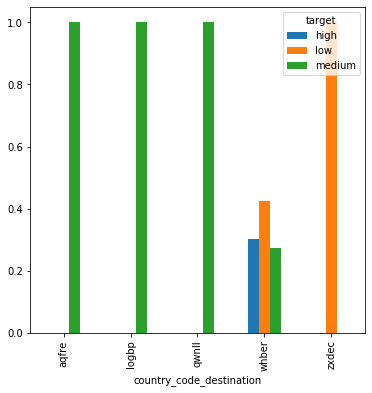

In [21]:
ccd = pd.crosstab(combi['country_code_destination'],combi['target'])
print(ccd)
ccd.div(ccd.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,6))

target       high  low  medium
current_day                   
Friday         79   96      49
Monday         79   68      82
Saturday       16   35      17
Sunday         47   41      31
Thursday       72  113      73
Tuesday        54   97      49
Wednesday      29   81      42


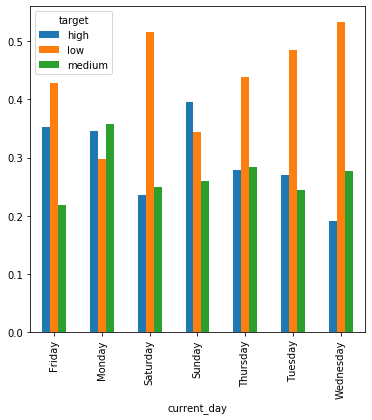

In [22]:
ccd = pd.crosstab(combi['current_day'],combi['target'])
print(ccd)
ccd.div(ccd.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,6))

target      high  low  medium
is_weekend                   
False        313  455     295
True          63   76      48


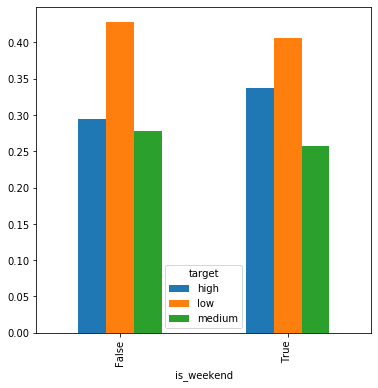

In [23]:
ccd = pd.crosstab(combi['is_weekend'],combi['target'])
print(ccd)
ccd.div(ccd.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,6))

target  high  low  medium
hour                     
0          4    4       1
1          4    2       1
2          1    1       2
4          0    1       0
5          2    5       3
6         19   13      18
7         53   39      45
8         34   35      41
9          9   32      17
10         4   42      14
11         2   23       9
12        14   44      13
13        10   30      12
14         5   15       9
15        18   34      15
16        54   67      53
17        53   34      30
18        20   18      25
19        21   21       7
20        17   23       8
21        16   20      12
22         5   21       5
23        11    7       3


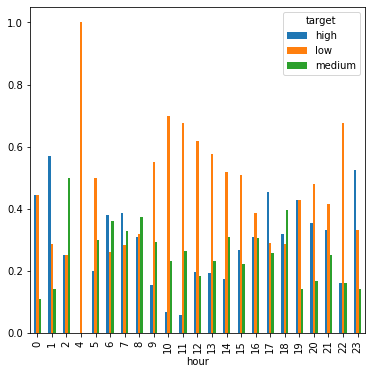

In [24]:
ccd = pd.crosstab(combi['hour'],combi['target'])
print(ccd)
ccd.div(ccd.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,6))

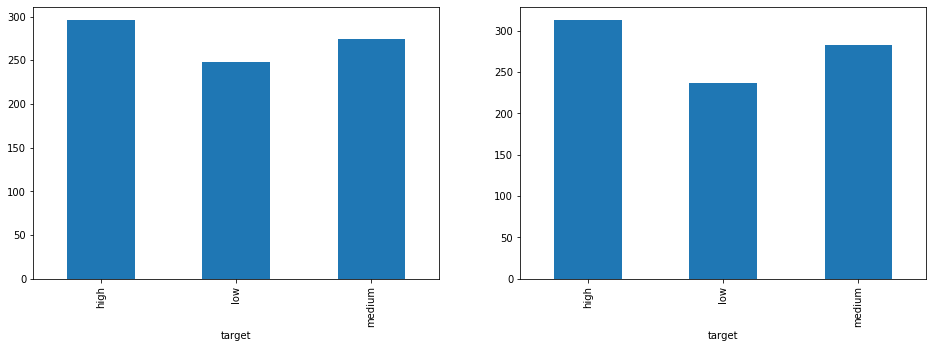

In [25]:
plt.subplot(121) 
combi.groupby('target')['mean_halt_times_source'].mean().plot.bar()
plt.subplot(122) 
combi.groupby('target')['mean_halt_times_destination'].mean().plot.bar(figsize=(16,5))
plt.show()

In [26]:
train.select_dtypes('object').columns

Index(['id_code', 'source_name', 'destination_name', 'train_name', 'target',
       'country_code_source', 'country_code_destination', 'current_day'],
      dtype='object')

In [27]:
label_encoder = preprocessing.LabelEncoder()
train['source_name'] = label_encoder.fit_transform(train['source_name'])
train['destination_name'] = label_encoder.fit_transform(train['destination_name'])
train['train_name'] = label_encoder.fit_transform(train['train_name'])
train['country_code_source'] = label_encoder.fit_transform(train['country_code_source'])
train['country_code_destination'] = label_encoder.fit_transform(train['country_code_destination'])
train['current_day'] = label_encoder.fit_transform(train['current_day'])

test['source_name'] = label_encoder.fit_transform(test['source_name'])
test['destination_name'] = label_encoder.fit_transform(test['destination_name'])
test['train_name'] = label_encoder.fit_transform(test['train_name'])
test['country_code_source'] = label_encoder.fit_transform(test['country_code_source'])
test['country_code_destination'] = label_encoder.fit_transform(test['country_code_destination'])
test['current_day'] = label_encoder.fit_transform(test['current_day'])

In [28]:
train['target'] = label_encoder.fit_transform(train['target'])

In [29]:
train['is_weekend'].replace(False, 0, inplace=True)
train['is_weekend'].replace(True, 1, inplace=True)

test['is_weekend'].replace(False, 0, inplace=True)
test['is_weekend'].replace(True, 1, inplace=True)

In [30]:
train.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,...,current_year,current_week,current_day,is_weekend,current_datetime,current_month,current_dayn,hour,minute,second
31,mgtoldpcbopaoba,13,65,72,0,2,4.360846,50.859663,640.265896,3,...,2016,30,6,0.0,2016-07-27 23:41:46,7,27,23,41,46
32,hbvekntxnxearzq,68,82,336,1,2,5.497685,50.967057,39.476879,3,...,2016,30,4,0.0,2016-07-28 00:04:25,7,28,0,4,25
34,rfwvjolvzoekxsq,68,28,336,1,2,5.497685,50.967057,39.476879,3,...,2016,30,4,0.0,2016-07-28 00:18:09,7,28,0,18,9
35,jcbfhwsqzpcifpe,37,15,146,0,2,4.482076,50.896456,171.020231,3,...,2016,30,4,0.0,2016-07-28 00:38:28,7,28,0,38,28
36,qfnccvisvjzlkxg,144,28,324,2,2,3.710675,51.035896,309.014451,3,...,2016,30,4,0.0,2016-07-28 08:50:27,7,28,8,50,27


In [31]:
train.dtypes

id_code                                object
source_name                             int32
destination_name                        int32
train_name                              int32
target                                  int32
country_code_source                     int32
longitude_source                      float64
latitude_source                       float64
mean_halt_times_source                float64
country_code_destination                int32
longitude_destination                 float64
latitude_destination                  float64
mean_halt_times_destination           float64
current_year                            int64
current_week                            int64
current_day                             int32
is_weekend                            float64
current_datetime               datetime64[ns]
current_month                           int64
current_dayn                            int64
hour                                    int64
minute                            

In [32]:
xtrain = train.drop(['id_code','current_datetime','target'], axis=1)
ytrain = train['target']
xtest = test.drop(['id_code','current_datetime'], axis=1)

In [33]:
x_train, x_valid, y_train, y_valid = train_test_split(xtrain, ytrain, 
                                                      test_size = 0.10, random_state=42)

In [34]:
classifier = LGBMClassifier(n_estimators=2000, learning_rate=0.2)
classifier.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_valid, y_valid.values)], 
               early_stopping_rounds=2000, verbose=100)

Training until validation scores don't improve for 2000 rounds.
[100]	training's multi_logloss: 0.0334296	valid_1's multi_logloss: 0.951387
[200]	training's multi_logloss: 0.00181387	valid_1's multi_logloss: 1.34276
[300]	training's multi_logloss: 0.000104668	valid_1's multi_logloss: 1.79405
[400]	training's multi_logloss: 1.31487e-05	valid_1's multi_logloss: 2.13332
[500]	training's multi_logloss: 7.78652e-06	valid_1's multi_logloss: 2.23619
[600]	training's multi_logloss: 6.04503e-06	valid_1's multi_logloss: 2.28619
[700]	training's multi_logloss: 5.13184e-06	valid_1's multi_logloss: 2.32198
[800]	training's multi_logloss: 4.58265e-06	valid_1's multi_logloss: 2.35281
[900]	training's multi_logloss: 4.19854e-06	valid_1's multi_logloss: 2.38253
[1000]	training's multi_logloss: 3.9223e-06	valid_1's multi_logloss: 2.40211
[1100]	training's multi_logloss: 3.71681e-06	valid_1's multi_logloss: 2.41523
[1200]	training's multi_logloss: 3.54724e-06	valid_1's multi_logloss: 2.43122
[1300]	train

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=2000, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
predicted = classifier.predict(x_valid)

In [36]:
n = x_train.shape[0]
p = x_train.shape[1] - 1
rsquared = classifier.score(x_train, y_train)
adj_rsquared = 1 - (1 - rsquared) * ((n - 1) / ( n - p - 1))

print("R-squared Value: ", rsquared)
print("Adjusted R-squared Value: ", adj_rsquared)

R-squared Value:  1.0
Adjusted R-squared Value:  1.0


In [37]:
f1_score(y_valid, predicted, average='micro')

0.632

In [38]:
pred_test = classifier.predict(xtest)
pred_test = label_encoder.inverse_transform(pred_test)

In [39]:
submission = pd.DataFrame()
submission['id_code'] = test['id_code']
submission['target'] = pred_test

In [40]:
submission.to_csv('lgbm.csv', header=True, index=False)